<a href="https://colab.research.google.com/github/labeah/Data_science/blob/master/Airbnb_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="25%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# Análise dos Dados do Airbnb - Berlim

O [Airbnb](https://www.airbnb.com.br/) é considerado uma das **maiores empresas de hoteleira da atualidade**. Mas uma informação curiosa é que ele **não possui nenhum hotel**!

Pessoas que querem viajar (e se hospedar) são conectadas com anfitriões que querem alugar seus imóveis de maneira prática. A empresa fornece uma plataforma inovadora para a realização dessas conexões.

A Startup foi fundada a 10 anos atrás e no final de 2018 já havia **hospedado mais de 300 milhões** de pessoas ao redor do mundo.

Uma de suas iniciativas é disponibilizar os dados algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *projeto*, iremos analisar os dados referentes à cidade de Berlim, na Alemanha. Veremos quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados foram obtidos por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise exploratória, será baixado apenas o arquivo:
 

*   `listings.csv` -	*Summary information and metrics for listings in Berlin (good for visualisations)*.



In [0]:
#Import dos pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#Import do arquivo listings.csv em um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2020-05-14/visualisations/listings.csv")

## Análise exploratória dos Dados
  Etapa na qual iremos criar uma consistência situacional, permitindo um entendimento de como os dados estão estruturados.


  **Dicionário de variáveis**


*   `id` -	ID gerado para a identificação do imóvel
*   `name` - Nome dado a propriedade anunciada
*   `neighbourhood_group` - Grupo de vizinhança
*   `neighbourhood` - Nome do bairro
*   `latitude` - Coordenada da latitude do imóvel
*   `longitude` - Coordenada da longitude do imóvel
*   `room_type` - Tipo de quarto ofertado
*   `price` - Preço do aluguel
*   `minimum_nights` - Quantidade mínima de noites para reserva
*   `number_of_reviews` - Quantidade de reviews do imóvel
*   `last_review` - Data do último review
*   `reviews_per_month` -  Quantidade de reviews por mês
*   `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
*   `availability_365` - Número de dias de disponibilidade dentro de 365 dias


Para dar inicio, vamos avaliar as 5 primeiras entradas (ou o head) do nosso dataset



In [0]:
#Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,132,2020-04-03,2.65,7,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.09,1,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.33,1,364
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.24,2,78
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,0


### **1- Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Neste tópico iremos identificar a quantidade de entradas e variáveis do nosso conjunto de dados. Também iremos identificar qual o tipo de cada coluna.

O *dataset* utiizado é a versão "resumida do portal mencionado. É possível baixar uma versão mais completa, com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [0]:
#Identifica o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}".format(df.shape[1]))

#Verifica os tipos das variáveis apresentadas
display(df.dtypes)

Entradas: 	 24678
Variáveis: 	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2- Há valores ausentes? Se sim, qual a porcentagem de ausência?**

A qualidade de um *dataset* é diretamente ligada à quantidade de valores ausentes. Por este motivo é importante entender logo no início se estes valores nulos são significativos quando comparados ao total de entradas.
* `reviews_per_month `: Possuí 18% de valores ausentes
* `last_review`: Possuí 18% de valores ausentes
* As variáveis `name` e `host_name` possuem aproximadamente 1% dos valores ausentes


In [0]:
#Ordena em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183807
last_review                       0.183807
name                              0.002026
host_name                         0.000851
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **3- Qual o tipo de distribuição das variáveis?**

Identificaremos a distribuição das variáveis, plotando histogramas.

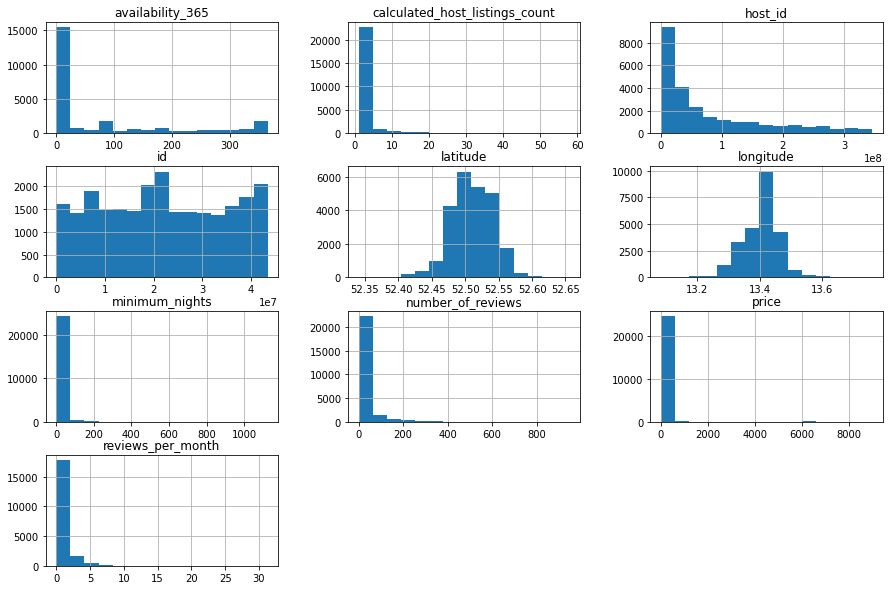

In [0]:
#Plota histograma das variáveis numéticas
df.hist(bins=15, figsize=(15,10));

### **4- Há outliers presentes?**

Outlier é um valor que foge da normalidade e que pode causar anomalias nos resultados obtidos.

Visualizando a distribuição dos histogramas, é possível verificar indícios de outliers. Por exemplo: variáveis `price`, `minimum_nights`, `calculated_host_listings_count`.

Estes valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras que auxiliam a detecção de *outliers*:
* Resumo estatístico com o método `describe()`
* Plotar `boxplots` para a variável








####Método `describe()`

In [0]:
#Visualizar o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24678.000000,24678.000000,24678.000000,20142.000000,24678.000000,24678.000000
mean,75.109409,7.394035,20.983305,0.850179,2.511468,75.013615
std,239.989351,27.988944,45.607124,1.274689,5.652053,118.603012
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,50.000000,3.000000,5.000000,0.370000,1.000000,0.000000
75%,79.000000,4.000000,18.000000,1.010000,2.000000,108.000000
max,9000.000000,1124.000000,950.000000,31.290000,58.000000,365.000000


Visualizando o resumo estatístico, podemos confirmar algumas hipóteses:
* A variável `price` possui 75% dos valores abaixo de 79, porém seu valor máximo é 9000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

####Boxplot para `minimum_nights`

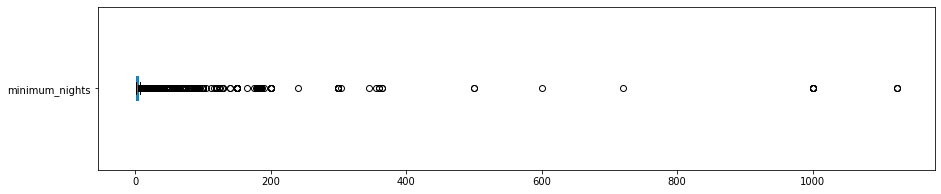

minimum_nights: valores acima de 100:
152 entradas
0.6159%


In [0]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Ver quantidade de valores acima de 100 dias para minimum_nights
print("minimum_nights: valores acima de 100:")
print("{} entradas".format(len(df[df.minimum_nights > 100])))
print("{:.4f}%".format((len(df[df.minimum_nights > 100]) / df.shape[0]*100)))

####Boxplot para `price`


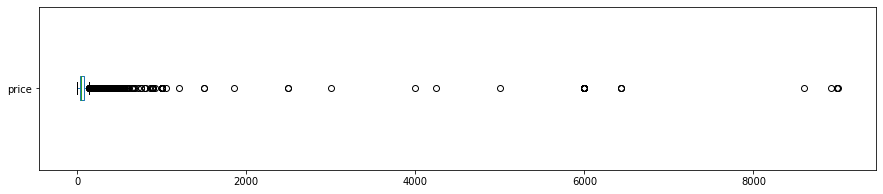

Price com valores acima de 120:
2181 entradas
8.8378%


In [0]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#Ver quantidade de valores acima de 120 para price
print("Price com valores acima de 120:")
print("{} entradas".format(len(df[df.price > 120])))
print("{:.4f}%".format((len(df[df.price > 120]) / df.shape[0]*100)))

####Histograma sem outliers

Após identificar os *outliers* podemos limpar o DataFrame e plotar novamente o histograma.

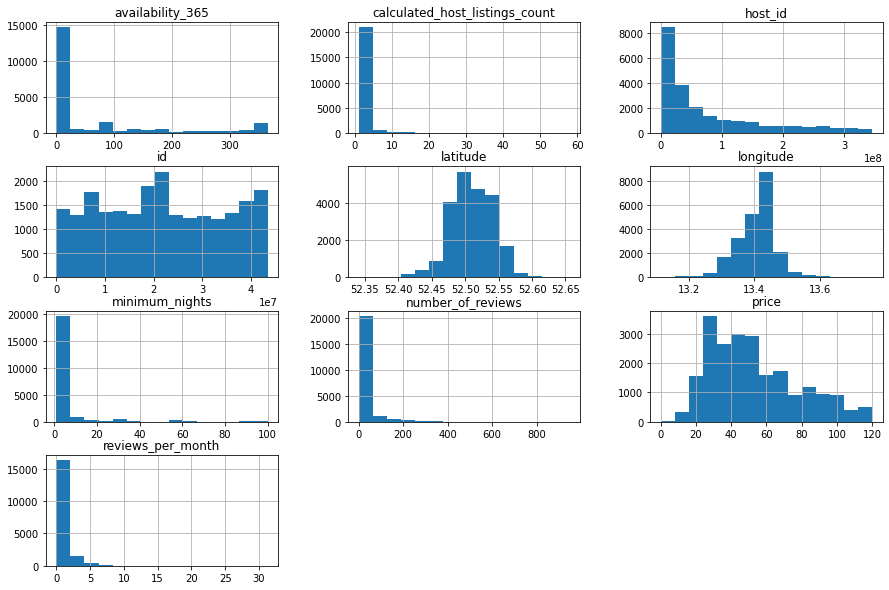

In [0]:
#Remove os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 120].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)

#Plota o histograma com o novo DataFrame
df_clean.hist(bins=15, figsize=(15,10));

### 5- Qual a correlação entre as variáveis

Correlação é a relação entre duas coisas. No contexto de DataFrames, buscamos relações ou semelhanças entre duas variáveis.

Para medirmos utilizamos o coeficiente de correlação, estabelecendo a intensidade dela. Para identificar as correlações entre as variáveis de interesse, vou:
* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn` 


In [0]:
#Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018817,0.080073,0.088802,0.081232,0.181692
minimum_nights,0.018817,1.000000,-0.058613,-0.099764,0.089072,0.186954
number_of_reviews,0.080073,-0.058613,1.000000,0.750251,0.066388,0.270152
reviews_per_month,0.088802,-0.099764,0.750251,1.000000,0.127500,0.278028
calculated_host_listings_count,0.081232,0.089072,0.066388,0.127500,1.000000,0.259425
availability_365,0.181692,0.186954,0.270152,0.278028,0.259425,1.000000


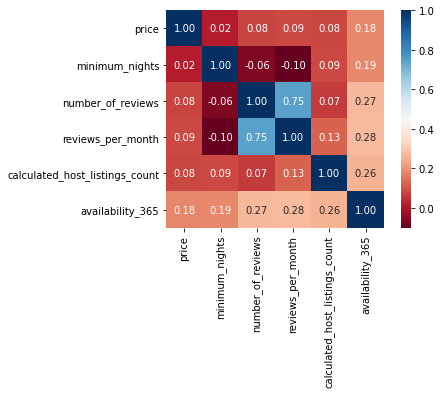

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### 6- Qual o tipo de imóvel mais alugado no Airbnb?

Nós temos o dado do tipo de imóvel na coluna da variável `room_type`. No site há opções de apartamentos/casa inteiras, apenas um quarto ou até mesmo dividir o quarto com outras pessoas.

A seguir, iremos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [0]:
#Mostra a quantidade de cada tipo de imóvel

df_clean.room_type.value_counts()

Private room       11172
Entire home/apt    10819
Shared room          269
Hotel room            91
Name: room_type, dtype: int64

In [0]:
#Mostra a porcentagem de cada tipo de imóvel
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.499843
Entire home/apt    0.484050
Shared room        0.012035
Hotel room         0.004071
Name: room_type, dtype: float64

### 7- Qual a localidade mais cara de Berlim?

Para verificar uma variável em função de outra nós usamos o método `groupby()`. Neste caso, iremos comparar os bairros(neighbourhoods) com os preços de locação (price).

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Schmöckwitz/Karolinenhof/Rauchfangswerder    72.050000
Rahnsdorf/Hessenwinkel                       71.586207
Regierungsviertel                            69.320988
Brunnenstr. Süd                              68.728814
Alexanderplatz                               67.057773
Prenzlauer Berg Südwest                      65.512590
Kurfürstendamm                               64.948718
Rummelsburger Bucht                          64.696970
Helmholtzplatz                               62.581948
Spandau Mitte                                62.086957
Name: price, dtype: float64

Podemos ver que: Os bairros Schmöckwitz, Rahnsdorf e Regierungsviertel são os 3 bairros mais caros. 
Uma pessoa sem conhecimento sobre os bairros, não questionaria esses valores, mas um cientista de dados iria a fundo nas informações:

In [0]:
#Ver quantidade de imóveis no bairro "Schmöckwitz"
print(df_clean[df_clean.neighbourhood == "Schmöckwitz/Karolinenhof/Rauchfangswerder"].shape)

#Ver quantidade de váriaveis de bairro
print(df_clean.neighbourhood.shape)

(20, 16)
(22351,)


Ao acessarmos a informação de quantidade de imóveis, vemos que temos apenas 20 imóveis neste bairro de 22351 valores , o que afetará nossa realidade.

###8- Gráfico de imóveis x localização

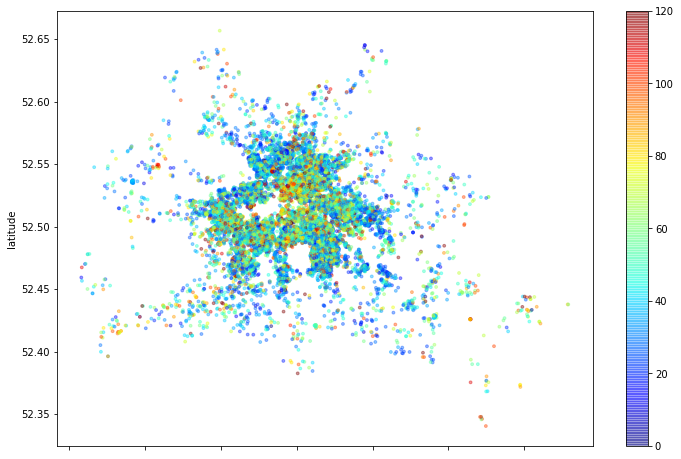

In [0]:
#Plota gráfico com escala de cores por preço

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

##Conclusão

Neste notebook foi feita uma análise superficial da base de dados disponibilizada pelo Airbnb, porém foi possível observar:
* A presença de *outliers* em algumas variáveis.
* Algumas localidades possuem poucos imóveis disponíveis, distorcendo informações estatísticas

E, para finalizar, é necessário lembrar que este *dataset* é uma versão resumida, apenas para uma abordagem inicial. O recomendado é que seja usado, para um maior detalhamento e assertividade, o conjunto de dados completo.
